# Bike Sharing Prediction Challenge
# Name : Apoorva Kumar

In [1]:
'Check the working directory'

import os
os.getcwd()

'/Users/apoorvgowda/Documents'

In [2]:
'Setting the working directory'
os.chdir('/Users/apoorvgowda/Documents/HDI Bike Saring Challenge')

In [3]:
os.getcwd()

'/Users/apoorvgowda/Documents/HDI Bike Saring Challenge'

In [4]:
'Importing the libraries'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [5]:
'Importing the dataset'

dataset = pd.read_csv('bike_share_day.csv')

In [6]:
'Displaying the first 3 rows of the data'
dataset.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


The task is to predict the bike sharing count on daily basis using the dataset which are recorded over two years ( 2011 and 2012).

The target variable is  "cnt" , which needs to be predicted. 

In [7]:
'Removing the unwanted columns'

dataset = dataset.drop(['instant','yr','dteday','casual','registered'], axis= 1)

1) instant (Record index) - We are not interested in index and hence this variable is removed

2) yr (Year) - The data set includes only two years (2011 and 2012). This variable is removed to avoid large extrapolation of the model

3) dteday (Date) - Weekday and month have already been extracted from date. So this variable doesn't have any significance. Hence it's removed

4) casual and registered - The target variable "cnt" is the decomposition of these two variables. We are interested in predicting the "cnt" (Count) variable. And hence "casual" and "registered" variables are removed

In [8]:
'Converting catogorical variables to type category'

dataset['season'] = dataset.season.astype('category')
dataset['mnth'] = dataset.mnth.astype('category')
#dataset['hr'] = dataset.hr.astype('category')
dataset['holiday'] = dataset.holiday.astype('category')
dataset['weekday'] = dataset.weekday.astype('category')
dataset['workingday'] = dataset.workingday.astype('category')
dataset['weathersit'] = dataset.weathersit.astype('category')

In [9]:
'Renaming the variables'
dataset.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hum': 'humidity',
                     'cnt':'count', 'temp':'temperature'},inplace=True)

In [10]:
'Dataset variable description'

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
season         731 non-null category
month          731 non-null category
holiday        731 non-null category
weekday        731 non-null category
workingday     731 non-null category
weather        731 non-null category
temperature    731 non-null float64
atemp          731 non-null float64
humidity       731 non-null float64
windspeed      731 non-null float64
count          731 non-null int64
dtypes: category(6), float64(4), int64(1)
memory usage: 34.2 KB


In [11]:
'Check for missing values'

dataset.isnull().any()

season         False
month          False
holiday        False
weekday        False
workingday     False
weather        False
temperature    False
atemp          False
humidity       False
windspeed      False
count          False
dtype: bool

No missing values found.

In [626]:
dataset.shape

(731, 11)

In [631]:
'Feature Importance'

from sklearn.ensemble import RandomForestRegressor 

Indepandant_Vars = dataset.drop(['count'], axis=1)
Depedant_Var = dataset['count']
 
rf = RandomForestRegressor() 
rf.fit(Indepandant_Vars.values, Depedant_Var.values) 
rf.score(Indepandant_Vars.values, Depedant_Var.values)

import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                    index = Indepandant_Vars.columns,
                columns=['importance']).sort_values('importance',ascending=False)


In [632]:
print(feature_importances)

             importance
temperature    0.444896
humidity       0.150828
atemp          0.102238
windspeed      0.094666
season         0.079966
month          0.042499
weekday        0.039762
weather        0.027702
workingday     0.010570
holiday        0.006873


1) Temperature is the most important feature with score of 0.44

2) Categorical features have got less scores but we can't conclude that the categorical variables are less important because the random forest feature importance will be biased towards the continuous variables and less biased towards categorical variables due to low cardinality in the categorical variables.

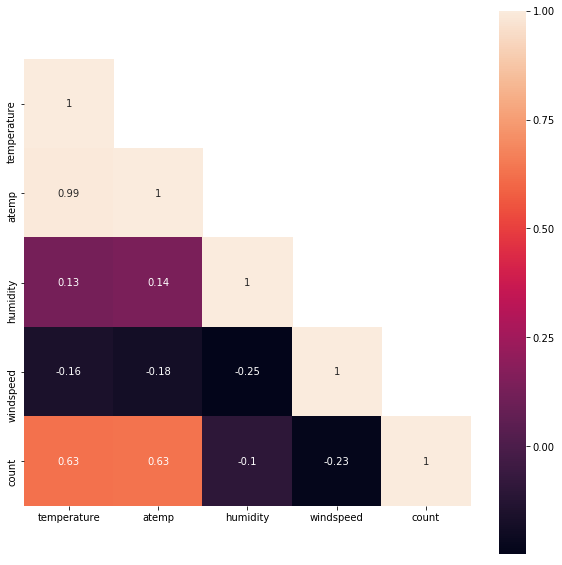

In [20]:
'Data Correlation to understand the relation between the variables'

#correlation = dataset.corr()
cor_mat= dataset[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

1) Correlation matrix displays only non catogorical variables

2) "temperature" and "atemp" variables are highly correlated to each other with 0.99 correlation coefficient. And the corr. coeff. of temperature and atemp variables are same (0.63) with the target varibale (count). Hence I have decided to remove "atemp" variable to avoid redundancy

3) "humidity" and "windspeed" variables are negatively correlated with "count" (-0.1 and -0.23 respectively)

In [21]:
"Removing the variables based on correlation analysis"

dataset = dataset.drop(['atemp'], axis= 1)

# Data Visualizations

Text(0.5, 1.0, 'Histogram of count')

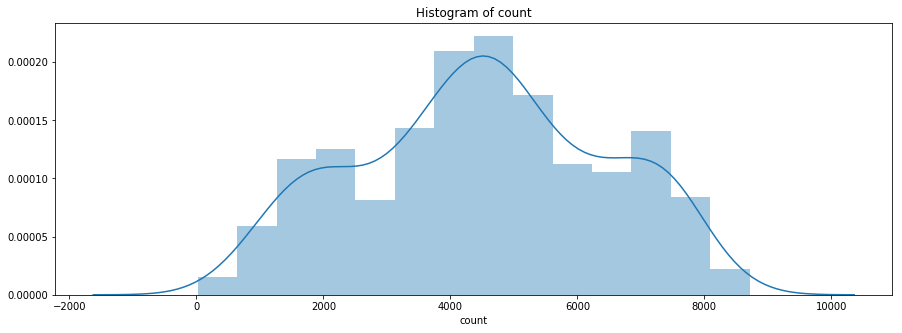

In [635]:
'Histogram of Count'

sns.distplot(dataset['count'], hist = True)
plt.title('Histogram of count')

Above figure is the histogram of the dependant variable 'Count'. Maximum values of count is distributed in the range of 3500 to 5500.

Text(0.5, 1.0, 'Box plot of Count')

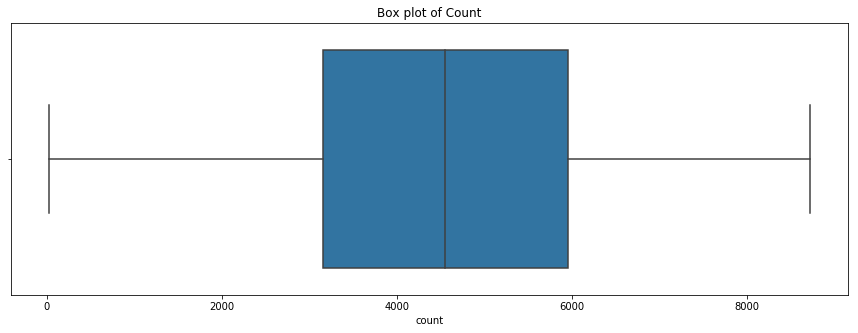

In [636]:
'Box plot of Count'
sns.boxplot(dataset['count'])
plt.title('Box plot of Count')

From the above box plot we can deduce that the dependant variable 'count' has no outliers.

Text(0, 0.5, 'Total count')

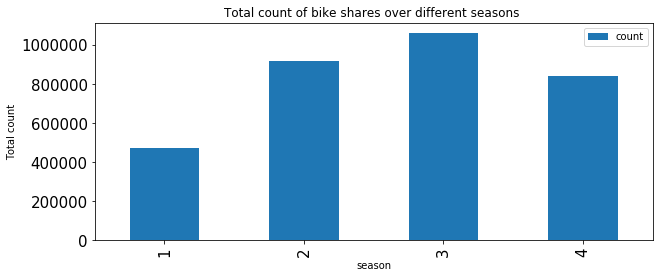

In [637]:

'Season vs Count'

import seaborn as sns
import matplotlib.pyplot as plt

dataset.groupby('season').sum().plot(y='count', kind='bar',
                                     figsize = (10,4), fontsize= 15)
plt.title('Total count of bike shares over different seasons ')
plt.ylabel('Total count')

1) Above figure shows the total count of bike sharing over different seasons

2) Season : season (1:spring, 2:summer, 3:fall, 4:winter)

3) Season 3 (fall) has maximum total count of bike sharing

4) Season 1 (spring) has the least total count of bike sharing

Text(0, 0.5, 'Total count')

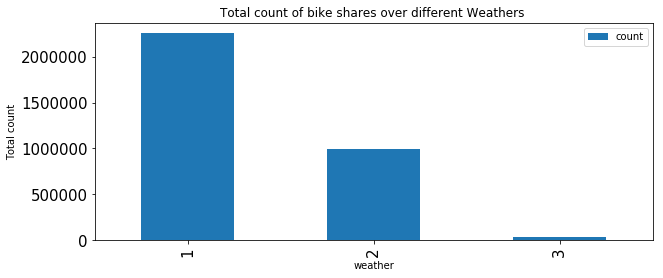

In [638]:
'Weather vs Count'

dataset.groupby('weather').sum().plot(y='count', kind='bar',
                                      figsize = (10,4), fontsize= 15)
plt.title('Total count of bike shares over different Weathers ')
plt.ylabel('Total count')

1) weather : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
2) As we can observe from the above figure that the total count is too less for weather 3 (Light Snow, Light Rain + Thunderstorm etc.). This weather condition does not suit for bike riding.

3) Maximum count is for the weather 1 (clear, partly cloudy etc.)

Text(0, 0.5, 'Total count')

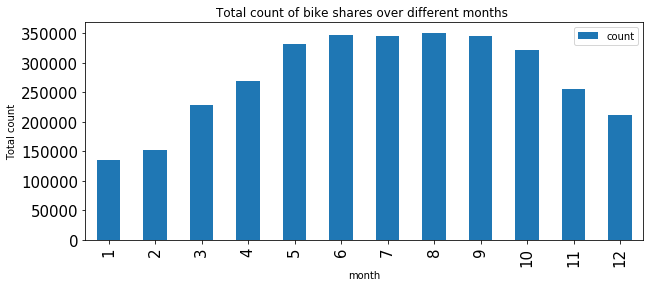

In [639]:
'Month vs Count'

dataset.groupby('month').sum().plot(y='count', kind='bar',
                                    figsize = (10,4), fontsize= 15)
plt.title('Total count of bike shares over different months ')
plt.ylabel('Total count')

1) Above figure shows the average count of bike sharing over different months of the year

2) The total count increases gradually from January to June

3) June, July, August and September months have the maximum counts

4) Total count decreases gradually from September to December

5) This indicates that the users use bikes more during the period of summer.


Text(0.5, 1.0, 'Weekday distribution of average count group by holiday ')

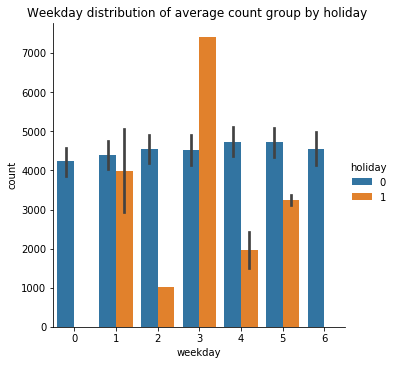

In [640]:
'Weekday vs Count group by holiday '

sns.catplot(x="weekday", y="count",kind= "bar", hue = "holiday" ,
            data=dataset,height=5,aspect=1)
plt.title('Weekday distribution of average count group by holiday ')

1) Above figure shows the average count of bike sharing over different days of the week

2) Weekday 0 and 6 corresponds to Sunday and Saturday respectively

3)  holiday : Whether day is holiday or not (0 - holiday, 1 - Working day)

4) Weekday 3 (Wednesday) with no holiday has the maximum average count of bike sharing

5) Weekday 2 (Tuesday) with no holiday has the least average count of bike sharing

6) Average count of bike sharing is almost the same irrespective of days during holidays (Blue color bars)

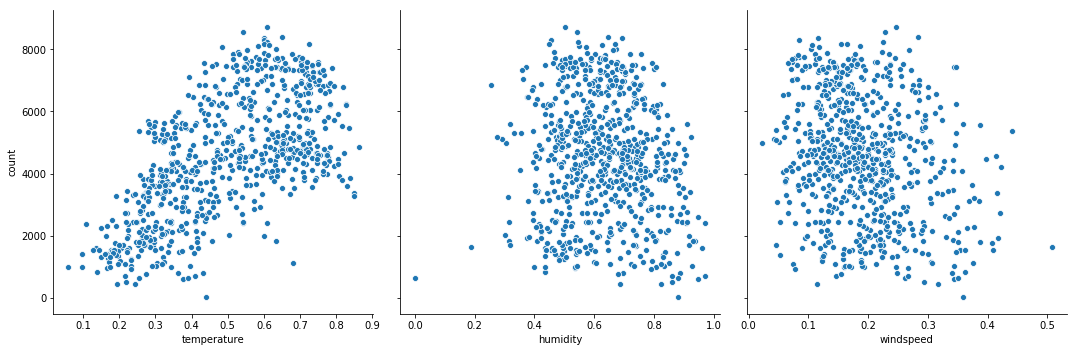

In [641]:
'Temerature and Humidity vs Count'

sns.pairplot(x_vars= ['temperature','humidity','windspeed'],
             y_vars=['count'],
             data = dataset, height = 5)

1) Above figure is the pair plot of bike sharing count vs temperature  and humidity .

2) temperature : Normalized temperature in Celsius. The values are divided to 41 (max)

3) humidity: Normalized humidity. The values are derived via (t- t_min)/(t_max-t_min), t_min=-8, t_max=+39

4) We can clearly observe that there is some linear relationship between count and temperature.

4) We can also observe that the the data points are scatterd all over the plane in both humidity and windspeed plots which indicates that the count is highly dependent on the temperature and catogorical variables than humidity and windspeed.


In [642]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
season         731 non-null category
month          731 non-null category
holiday        731 non-null category
weekday        731 non-null category
workingday     731 non-null category
weather        731 non-null category
temperature    731 non-null float64
humidity       731 non-null float64
windspeed      731 non-null float64
count          731 non-null int64
dtypes: category(6), float64(3), int64(1)
memory usage: 28.5 KB


In [22]:
'One hot encoding of catogorical variables'

dataset = pd.get_dummies(dataset, prefix=['season', 'month','holiday',
                                        'weekday','workingday','weather'], drop_first = True)

1) One hot encoding is the process of coverting catogorical variables to binary variables

2) This technique is applied to provide equal weights to the classes of categorical variables. Especially for multi class variables, the machine learning models are tend to bias towards the calss with higher value. One hot encoding avoids this by converting it to binary variables (1 or 0)

3) The new binary variables are called as dummy variables which are created using pandas "get_dummies" function and set the "drop_first" attribute to "True" to avoid multicollinearity

In [23]:
dataset.shape

(731, 28)

Dimension of the datasaet after preprocessing (731 rows and 28 columns)

In [24]:
'Selecting Predictors and target variables'

X = dataset.drop(['count'], axis=1)
y = dataset['count']

In [25]:
'Train test splitting'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

Test data size chosen is 20% to evaluate the machine learning model.

# Linear Regression

In [37]:
'Linear Regression model'

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

'Model Evaluation'

from sklearn.metrics import r2_score, mean_squared_log_error
msle = mean_squared_log_error(y_test,prediction)
R_squared = r2_score(y_test,prediction)


print('MSLE Error of the test data',round(msle,3))
print('R_squared of the test data',round(R_squared,3))

MSLE Error of the test data 0.108
R_squared of the test data 0.59


In [648]:
'Stats model'

import statsmodels.api as sm
X_train1 = sm.add_constant(X_train)
model =sm.OLS(y_train,X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     29.95
Date:                Sun, 19 May 2019   Prob (F-statistic):           1.53e-88
Time:                        19:19:45   Log-Likelihood:                -4995.6
No. Observations:                 584   AIC:                         1.005e+04
Df Residuals:                     557   BIC:                         1.016e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3055.6140    437.965      6.977   

1) Adjusted R-Squared of the training data : 0.564

2) F - Statistic of the training data : 29.95

Text(0.5, 1.0, 'Actual and prediction vs Index (100 samples chosen)')

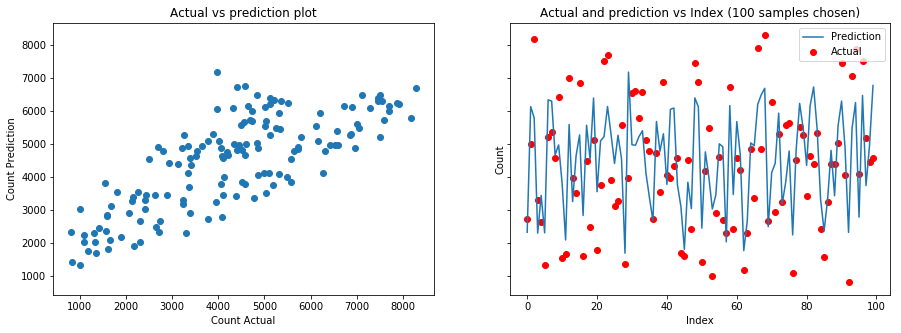

In [649]:
'Actual vs Prediction plot'
plotsize = 100
xrange = np.arange(len(y_test))
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axs[1].scatter(xrange[0:plotsize],y_test[0:plotsize] , c= 'red', label = 'Actual')
axs[1].plot(xrange[0:plotsize],prediction[0:plotsize], label = 'Prediction')
axs[0].scatter(y_test[0:len(y_test)],prediction[0:len(y_test)])


axs[0].set_ylabel('Count Prediction')
axs[0].set_xlabel('Count Actual')
axs[0].set_title('Actual vs prediction plot')

axs[1].set_ylabel('Count')
axs[1].set_xlabel('Index')
axs[1].legend(loc = 1)
axs[1].set_title('Actual and prediction vs Index (100 samples chosen)')

As we can observe from the above plot (Actual and prediction vs Index) the linear regression model fit is not good. Non linear models like Random forest, KNN regressor and SVM regressor (kernel 'poly' or 'rbf') would perform better for this data. Deep learning models are not recommended due to less number of data samples.

In [38]:
'Dimensionality reduction based on P-values'

X_new = dataset.drop(['count','month_2','month_4','month_5','month_11','month_12','month_8','weather_2','month_6',
                      'month_3','weekday_2','weekday_3','weekday_4','weekday_1',
                      'holiday_1','weekday_5','season_3'], axis=1)
y_new = dataset['count']


1) The features are removed based on P-Values. P-Values decides whether to reject null hypothesis or not.

2) The Null hypothesis is : Remove all features

3) As per statistics if the p-values <= 0.05 we can reject Null hypothesis. Hence I have decided to keep the features which have p-values less than 0.05 (reject null hypothesis) and removed all the features which have high p-values.

In [39]:
'Train test splitting'

from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, 
                                                y_new, test_size=0.2, random_state=142)

In [40]:
'Linear Regression model'

lr_new = LinearRegression()
lr_new.fit(X_train_new,y_train_new)
prediction_new = lr_new.predict(X_test_new)


msle_new = mean_squared_log_error(y_test_new,prediction_new)
R_squared_new = r2_score(y_test_new,prediction_new)


print('MSLE of the test data after dimensionality reduction', round(msle_new,3))
print('R_squared of the test data after dimensionality reduction',round(R_squared_new,3))


MSLE of the test data after dimensionality reduction 0.109
R_squared of the test data after dimensionality reduction 0.58


In [41]:
'Stats model'

X_train1_new = sm.add_constant(X_train_new)
model_new =sm.OLS(y_train_new,X_train1_new).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     70.46
Date:                Sun, 26 May 2019   Prob (F-statistic):           7.71e-99
Time:                        18:45:32   Log-Likelihood:                -5000.9
No. Observations:                 584   AIC:                         1.003e+04
Df Residuals:                     572   BIC:                         1.008e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3124.6736    378.367      8.258   

1) Adjusted R-Squared of the training data : 0.567

2) F - Statistic of the training data : 70.46

Conclusion:

Even after removing features we dont't see any drastic change in the results of the linear regression model. Adjusted R squared remains almost the same. And F-Statistic has improved.

Text(0.5, 1.0, 'Actual and prediction vs Index (100 samples chosen)')

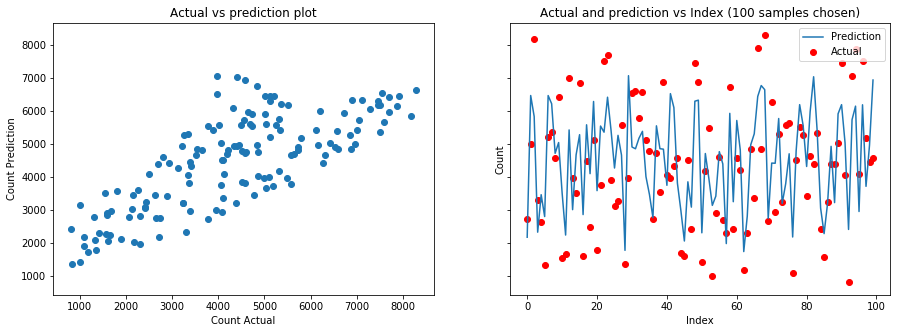

In [654]:
'Actual vs Prediction plot'
plotsize = 100
xrange = np.arange(len(y_test_new))
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axs[1].scatter(xrange[0:plotsize],y_test_new[0:plotsize] , c= 'red', label = 'Actual')
axs[1].plot(xrange[0:plotsize],prediction_new[0:plotsize], label = 'Prediction')
axs[0].scatter(y_test_new[0:len(y_test_new)],prediction_new[0:len(y_test_new)])


axs[0].set_ylabel('Count Prediction')
axs[0].set_xlabel('Count Actual')
axs[0].set_title('Actual vs prediction plot')

axs[1].set_ylabel('Count')
axs[1].set_xlabel('Index')
axs[1].legend(loc = 1)
axs[1].set_title('Actual and prediction vs Index (100 samples chosen)')